<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집분석
  - 비지도 학습 : 정답이 없다.
  - 지도 학습 : 회귀, 분류

In [57]:
# 소비자의 군집분석(타켓 마케팅)

# K-평균 알고리즘 : kluster 군집의 개수

# K-평균 알고리즘 : kluster 군집의 개수
  - 임의의 K개수만큼 점을 찍고 각 점과 데이터 사이의 거리를 계산(유클리디안 거리의 제곱)한 다음 평균 지점으로 이동을 계속 하면서 더 이상 이동 할 수 없을 때 까지 이동한다.
  - 단점 : 클러스터의 개수를 직접 지정
    - 적합한 개수는 : 엘보우 기법으로 확인한다.
  - 엘보우기법
    - 왜곡 : 중심점과 데이터의 거리차이의 제곱합
    - K 개수를 늘리면서 그래프를 그려보면 꺽이는 지점
  - 실루엣 분석 : 시각화
    - 클러스터내에 있는 데이터가 얼마나 모여있는지 측정하는 도구
    - 실루엣 계수 : -1~1 사이의 값을 가진다 1에 가까울 수록 좋은 군집화

In [58]:
!pip install ucimlrepo

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [60]:
X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [61]:
X['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [62]:
X['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [63]:
X.value_counts()

Description                          Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
PINK REGENCY TEACUP AND SAUCER       1         6/5/2011 11:37    2.95       16923.0     United Kingdom    20
GREEN REGENCY TEACUP AND SAUCER      1         6/5/2011 11:37    2.95       16923.0     United Kingdom    12
PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        10/26/2011 12:46  1.25       14102.0     United Kingdom     8
METAL SIGN,CUPCAKE SINGLE HOOK       1         3/24/2011 12:11   1.25       16904.0     United Kingdom     6
BATH BUILDING BLOCK WORD             1         12/12/2010 14:27  5.95       15044.0     United Kingdom     6
                                                                                                          ..
HAND WARMER OWL DESIGN               12        11/9/2011 11:16   2.10       16592.0     United Kingdom     1
                                               11/8/2011 8:18    2.10       15434.0     United Kingdom     1
                                               11/8/2011 10:17   2.10       17091.0     United Kingdom     1
                                               11/7/2011 14:44   2.10       16570.0     United Kingdom     1
ZINC WIRE SWEETHEART LETTER TRAY     24        4/28/2011 10:20   3.29       14298.0     United Kingdom     1
Name: count, Length: 401528, dtype: int64

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [65]:
idx = X.isna().apply(lambda x: x.any(), axis=1)
X[idx]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...
541536,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [66]:
X.isnull().sum()

,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [67]:
X[X['Description'].isna()]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...
535322,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [68]:
X = X.dropna(subset=['Description'])

In [69]:
X.reset_index(drop=True, inplace=True)

In [70]:
X.shape

(540455, 6)

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     540455 non-null  int64  
 2   InvoiceDate  540455 non-null  object 
 3   UnitPrice    540455 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.7+ MB


In [72]:
X.describe(include='all')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,540455,540455.000000,540455,540455.000000,406829.000000,540455
unique,4223,NaN,22309,NaN,NaN,38
top,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,2369,NaN,1114,NaN,NaN,494024
mean,NaN,9.603129,NaN,4.623519,15287.690570,NaN
std,NaN,218.007598,NaN,96.889628,1713.600303,NaN
min,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [73]:
X.iloc[1442:1480]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1442,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1443,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1445,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1446,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1448,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1449,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,CHRISTMAS HANGING TREE WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom


In [74]:
X[X['CustomerID'].isna()]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1442,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1443,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1445,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1446,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...
540082,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
540083,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
540084,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
540085,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [75]:
X.isna().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133626
Country,0


In [76]:
# CustomerID 가 null인 항목 제외
# idx = X['CustomerID'].isna()
# X = X[~idx]
X.dropna(subset=['CustomerID'], inplace=True)

<ipython-input-76-a209190a8ee3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['CustomerID'], inplace=True)


In [77]:
X.reset_index(drop=True, inplace=True)

In [78]:
X


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
406824,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [79]:
# Quantity 값이 양수인 데이터 추출
idx = X['Quantity'] > 0
X = X[idx]

In [80]:
X.shape

(397924, 6)

In [81]:
X.reset_index(drop=True, inplace=True)

In [82]:
X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
397919,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
397920,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
397921,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
397922,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [83]:
X['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [84]:
X['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
...,...
15313.0,1
17846.0,1
13185.0,1


In [85]:
X['Description'].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1724
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1397
...,...
RUBY GLASS CLUSTER EARRINGS,1
PINK CHRYSANTHEMUMS ART FLOWER,1
72 CAKE CASES VINTAGE CHRISTMAS,1


In [86]:
# 거래와 관련된 도메인 지식이 필요하고, 거래의 특성을 나타내는 컬럼이 필요
# 제품수, 거래건수, 고객수를 구해본다

In [87]:
X = pd.DataFrame(X)

In [88]:
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])

In [89]:
X.groupby(['CustomerID','InvoiceDate']).agg({'Description':'count'}) ## 제품수

Description
CustomerID InvoiceDate                     
12346.0    2011-01-18 10:01:00            1
12347.0    2010-12-07 14:57:00           31
           2011-01-26 14:30:00           29
           2011-04-07 10:43:00           24
           2011-06-09 13:01:00           18
...                                     ...
18283.0    2011-11-30 12:59:00           52
           2011-12-06 12:02:00           50
18287.0    2011-05-22 10:39:00           29
           2011-10-12 10:23:00           38
           2011-10-28 09:29:00            3

[18444 rows x 1 columns]

In [90]:
X.groupby(['CustomerID','InvoiceDate']).agg({'Quantity':'sum'}) ## 거래건수

Quantity
CustomerID InvoiceDate                  
12346.0    2011-01-18 10:01:00     74215
12347.0    2010-12-07 14:57:00       319
           2011-01-26 14:30:00       315
           2011-04-07 10:43:00       483
           2011-06-09 13:01:00       196
...                                  ...
18283.0    2011-11-30 12:59:00       134
           2011-12-06 12:02:00       142
18287.0    2011-05-22 10:39:00       488
           2011-10-12 10:23:00       990
           2011-10-28 09:29:00       108

[18444 rows x 1 columns]

In [91]:
product_count = X['Description'].value_counts().shape[0]
transaction_count = X['InvoiceDate'].value_counts().shape[0]
customer_count = X['CustomerID'].value_counts().shape[0]

In [92]:
pd.DataFrame(data=[product_count, transaction_count, customer_count], index=['제품수','거래건수','고객수'], columns=['counts'])

,counts
제품수,3877
거래건수,17286
고객수,4339


In [93]:
# X데이터에 총 거래건수를 추가 SaleAcount
X['SaleAmount'] = X['Quantity'] * X['UnitPrice']
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [94]:
# 고객의 주문 횟수, 주문 총액, 마지막 주문 후 며칠이 지났는지에 대한 정보를 추출

In [95]:
# df1 = X.groupby(['CustomerID']).agg({'SaleAmount':'sum'}) # 고객 당 주문 총액

In [96]:
# df2 = X.groupby(['CustomerID']).agg({'InvoiceDate':'count'}) # 고객 당 주문 횟수

In [97]:
# today_datetime = pd.Timestamp.today().to_pydatetime()
# df3 = today_datetime - X.groupby(['CustomerID']).agg({'InvoiceDate':'max'}) # 고객 당 마지막 주문일

In [98]:
# merge_df = pd.concat([df1,df2,df3], axis=1)

In [99]:
# merge_df.columns = ['주문총액','주문횟수','마지막주문후지난일수']

In [100]:
# merge_df['마지막주문후지난일수'] = merge_df['마지막주문후지난일수'].dt.days

In [101]:
# merge_df

In [102]:
# from sklearn.cluster import KMeans



In [103]:
df1 = X.groupby('CustomerID')['InvoiceDate'].count()
df2 = X.groupby('CustomerID')['SaleAmount'].sum()
df3 = X.groupby('CustomerID')['InvoiceDate'].max()
pd.concat([df1,df2,df3], axis=1)

,InvoiceDate,SaleAmount,InvoiceDate
CustomerID,,,
12346.0,1,77183.60,2011-01-18 10:01:00
12347.0,182,4310.00,2011-12-07 15:52:00
12348.0,31,1797.24,2011-09-25 13:13:00
12349.0,73,1757.55,2011-11-21 09:51:00
12350.0,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280.0,10,180.60,2011-03-07 09:52:00
18281.0,7,80.82,2011-06-12 10:53:00
18282.0,12,178.05,2011-12-02 11:43:00


In [104]:
df = X.groupby('CustomerID').agg(
    {
    'InvoiceDate':['count','max'],
    'SaleAmount':'sum',
    }
)
# CustomerID는 정수로 표현하는 것이 계산하기 좋음
# df['CustomerID'] = df['CustomerID'].astype('int')
df.head()

InvoiceDate                     SaleAmount
                 count                 max        sum
CustomerID                                           
12346.0              1 2011-01-18 10:01:00   77183.60
12347.0            182 2011-12-07 15:52:00    4310.00
12348.0             31 2011-09-25 13:13:00    1797.24
12349.0             73 2011-11-21 09:51:00    1757.55
12350.0             17 2011-02-02 16:01:00     334.40

In [105]:
df.rename(columns={
    'count':'frequency',
    'sum':'grosssales',
    'max':'days_after_last_order'
}, inplace=True)

In [106]:
df

InvoiceDate                       SaleAmount
             frequency days_after_last_order grosssales
CustomerID                                             
12346.0              1   2011-01-18 10:01:00   77183.60
12347.0            182   2011-12-07 15:52:00    4310.00
12348.0             31   2011-09-25 13:13:00    1797.24
12349.0             73   2011-11-21 09:51:00    1757.55
12350.0             17   2011-02-02 16:01:00     334.40
...                ...                   ...        ...
18280.0             10   2011-03-07 09:52:00     180.60
18281.0              7   2011-06-12 10:53:00      80.82
18282.0             12   2011-12-02 11:43:00     178.05
18283.0            756   2011-12-06 12:02:00    2094.88
18287.0             70   2011-10-28 09:29:00    1837.28

[4339 rows x 3 columns]

In [107]:
# today_datetime = pd.Timestamp.today().to_pydatetime()

In [108]:
df[('InvoiceDate', 'days_after_last_order')] = (pd.Timestamp.today() - df[('InvoiceDate', 'days_after_last_order')]).dt.days

In [109]:
df

InvoiceDate                       SaleAmount
             frequency days_after_last_order grosssales
CustomerID                                             
12346.0              1                  4957   77183.60
12347.0            182                  4633    4310.00
12348.0             31                  4706    1797.24
12349.0             73                  4650    1757.55
12350.0             17                  4941     334.40
...                ...                   ...        ...
18280.0             10                  4909     180.60
18281.0              7                  4812      80.82
18282.0             12                  4639     178.05
18283.0            756                  4635    2094.88
18287.0             70                  4674    1837.28

[4339 rows x 3 columns]

<Axes: >

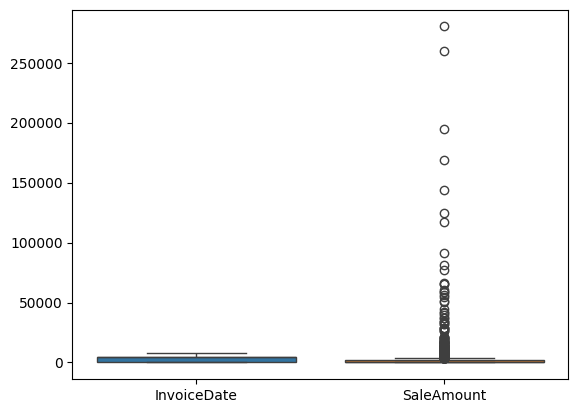

In [110]:
sns.boxplot(data=df)

In [111]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')  # 또는 'NanumGothic'으로 설정



(-100.0, 300.0)

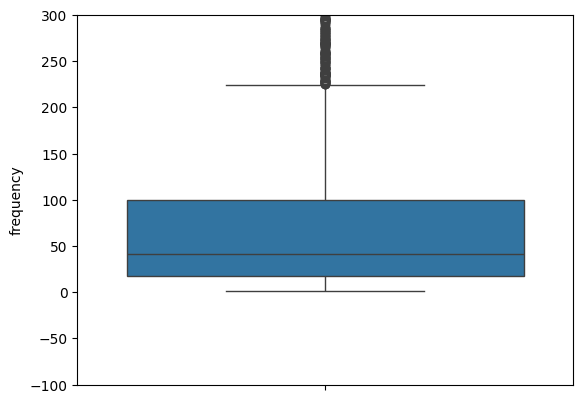

In [125]:
# 컬럼 레벨을 하나로 만들어 준다.
# df.columns = df.columns.droplevel(0)

sns.boxplot(data=df['frequency'])
plt.ylim(-100,300)


In [117]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[-3.96512139e-01,  2.33560390e+00,  8.35963391e+00],
       [ 3.94687670e-01, -9.04327468e-01,  2.51046358e-01],
       [-2.65374049e-01, -1.74342931e-01, -2.85464504e-02],
       ...,
       [-3.48428173e-01, -8.44328739e-01, -2.08712435e-01],
       [ 2.90379646e+00, -8.84327891e-01,  4.57171586e-03],
       [-9.48945321e-02, -4.94336152e-01, -2.40912314e-02]])

(-3.0, 3.0)

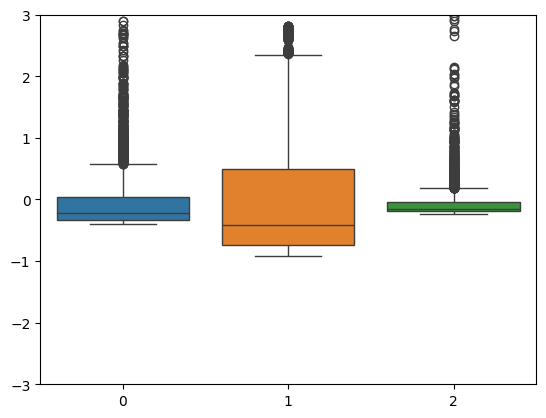

In [119]:
sns.boxplot(data=df_scaled)
plt.ylim(-3,3)

데이터는 아웃레이어가 많음 : 로그함수 이용해서 고르게 펴준다

In [126]:
df['frequency'] = np.log1p(df['frequency'])
df['grosssales'] = np.log1p(df['grosssales'])
df['days_after_last_order'] = np.log1p(df['days_after_last_order'])

In [127]:
df

,frequency,days_after_last_order,grosssales
CustomerID,,,
12346.0,0.693147,8.508758,11.253955
12347.0,5.209486,8.441176,8.368925
12348.0,3.465736,8.456806,7.494564
12349.0,4.304065,8.444838,7.472245
12350.0,2.890372,8.505525,5.815324
...,...,...,...
18280.0,2.397895,8.499029,5.201806
18281.0,2.079442,8.479076,4.404522
18282.0,2.564949,8.442470,5.187665


<Axes: ylabel='grosssales'>

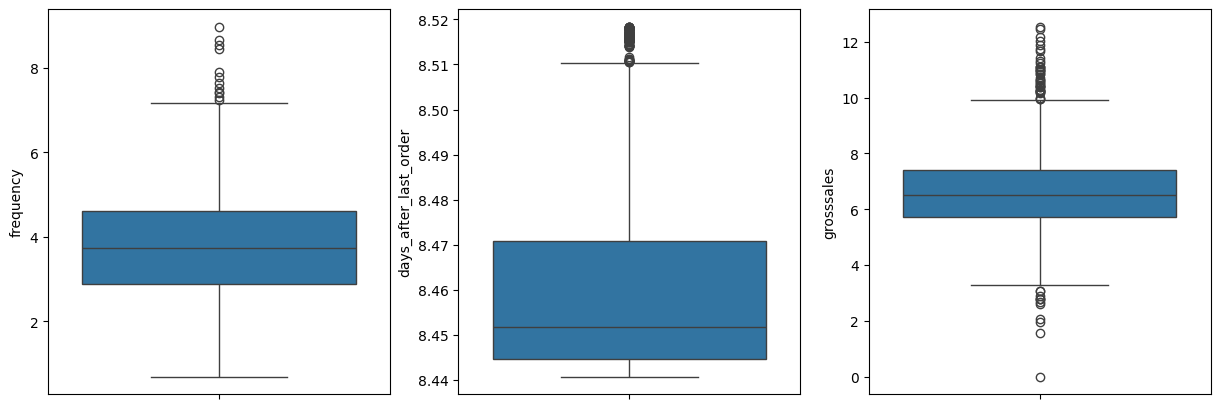

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=df.iloc[:,0])
plt.subplot(1,3,2)
sns.boxplot(data=df.iloc[:,1])
plt.subplot(1,3,3)
sns.boxplot(data=df.iloc[:,2])

정규화
- boxplot 으로 이상치 여부 확인

In [137]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,frequency,days_after_last_order,grosssales
0,-0.396512,2.335604,8.359634
1,0.394688,-0.904327,0.251046
2,-0.265374,-0.174343,-0.028546
3,-0.081781,-0.734331,-0.032963
4,-0.326572,2.175607,-0.191315
...,...,...,...
4334,-0.357171,1.855614,-0.208429
4335,-0.370285,0.885635,-0.219531
4336,-0.348428,-0.844329,-0.208712
4337,2.903796,-0.884328,0.004572


(-0.25, 0.25)

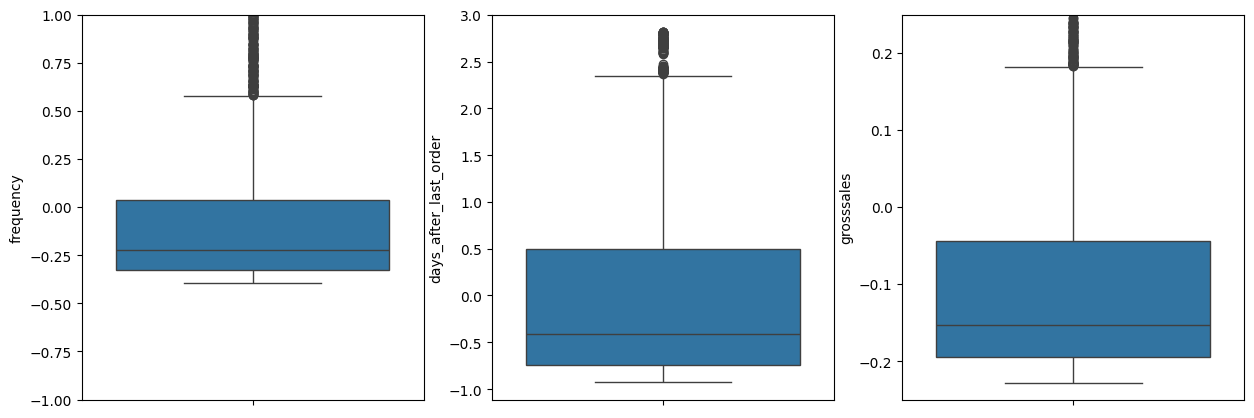

In [142]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=df_scaled.iloc[:,0])
plt.ylim(-1,1)
plt.subplot(1,3,2)
sns.boxplot(data=df_scaled.iloc[:,1])
plt.subplot(1,3,3)
sns.boxplot(data=df_scaled.iloc[:,2])
plt.ylim(-0.25,0.25)

In [143]:
df_scaled2 = StandardScaler().fit_transform(df)

In [144]:
df_scaled2

array([[-2.43282745,  2.31943446,  3.69616759],
       [ 1.17736943, -0.91424803,  1.40875812],
       [-0.21652101, -0.1663634 ,  0.71551656],
       ...,
       [-0.93657697, -0.85233523, -1.11351869],
       [ 2.31236747, -0.89360153,  0.83695422],
       [ 0.42052698, -0.49276518,  0.73297676]])

<Axes: ylabel='grosssales'>

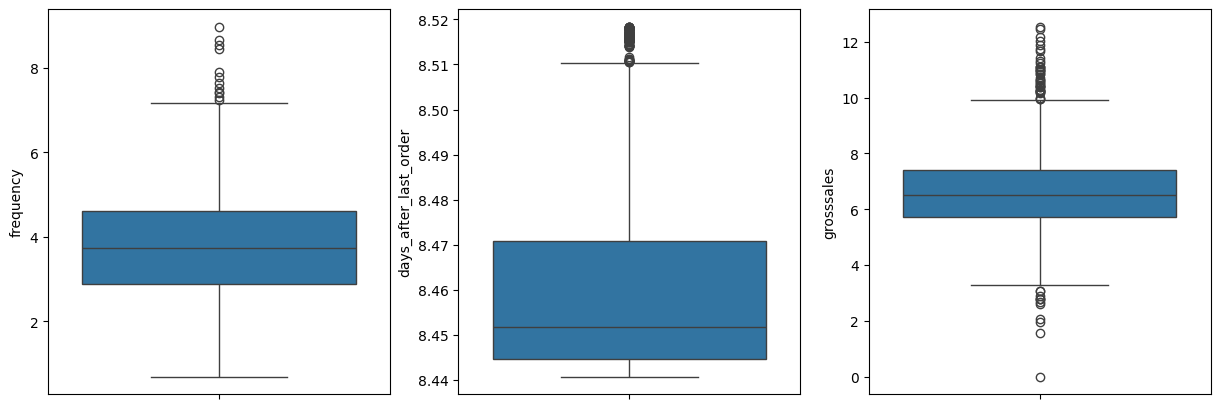

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=df.iloc[:,0])
plt.subplot(1,3,2)
sns.boxplot(data=df.iloc[:,1])
plt.subplot(1,3,3)
sns.boxplot(data=df.iloc[:,2])

In [146]:
# nan or infinity 처리하기
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [147]:
df

,frequency,days_after_last_order,grosssales
CustomerID,,,
12346.0,0.693147,8.508758,11.253955
12347.0,5.209486,8.441176,8.368925
12348.0,3.465736,8.456806,7.494564
12349.0,4.304065,8.444838,7.472245
12350.0,2.890372,8.505525,5.815324
...,...,...,...
18280.0,2.397895,8.499029,5.201806
18281.0,2.079442,8.479076,4.404522
18282.0,2.564949,8.442470,5.187665


<Axes: ylabel='grosssales'>

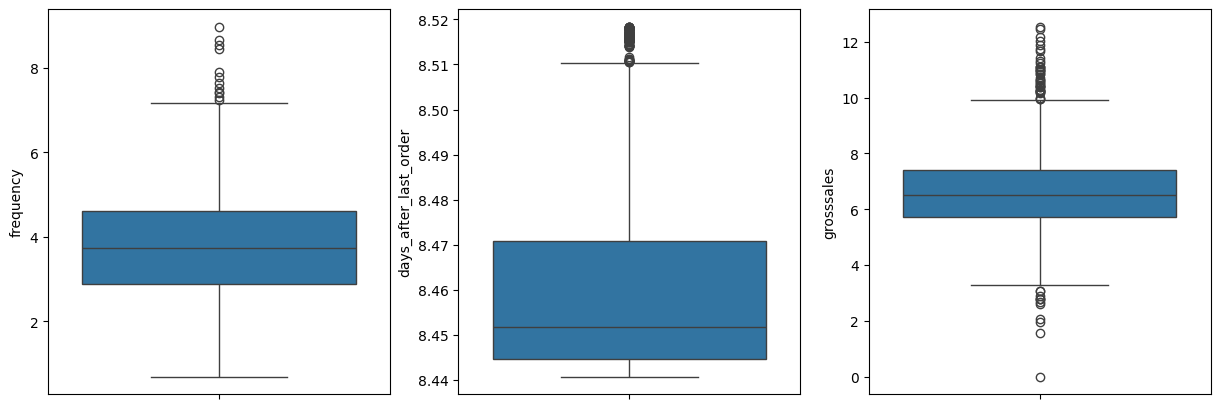

In [148]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=df.iloc[:,0])
plt.subplot(1,3,2)
sns.boxplot(data=df.iloc[:,1])
plt.subplot(1,3,3)
sns.boxplot(data=df.iloc[:,2])

# 분석모델 구축

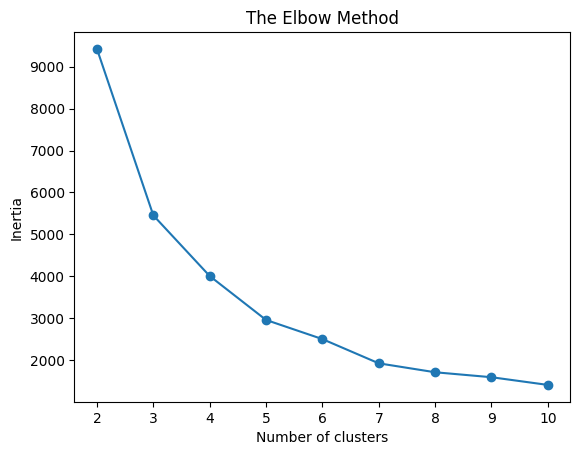

In [156]:
# K 평균 군집화를 위한 k_means 모델
# 실루엣 계수사용 라이브러리 임포드
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

result = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(df_scaled)
  result.append(kmeans.inertia_)

plt.plot(range(2,11), result, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [159]:
# 최적의 클러스터를 찾았기 때문에 모델을 다시 구성 k=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(df_scaled)

kmeans.fit(df)
y_lables = kmeans.predict(df)
y_lables

array([1, 1, 2, ..., 0, 1, 2], dtype=int32)

In [160]:
df['cluster'] = y_lables


In [161]:
df

,frequency,days_after_last_order,grosssales,cluster
CustomerID,,,,
12346.0,0.693147,8.508758,11.253955,1
12347.0,5.209486,8.441176,8.368925,1
12348.0,3.465736,8.456806,7.494564,2
12349.0,4.304065,8.444838,7.472245,2
12350.0,2.890372,8.505525,5.815324,0
...,...,...,...,...
18280.0,2.397895,8.499029,5.201806,0
18281.0,2.079442,8.479076,4.404522,0
18282.0,2.564949,8.442470,5.187665,0


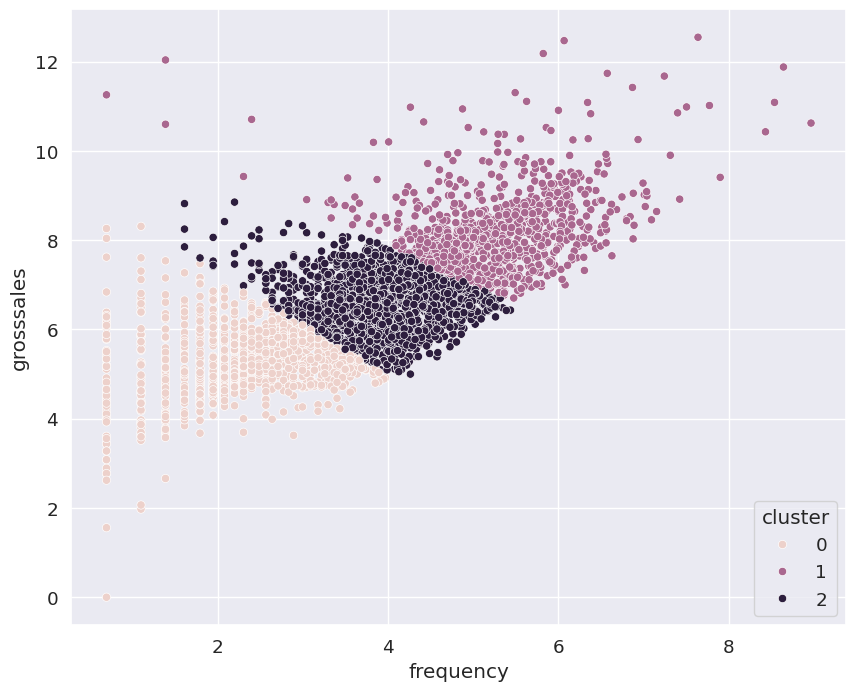

In [168]:
# clusterLabel 에 따른 데이터 분포를 산점도로 그리기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x='frequency', y='grosssales', hue='cluster', data=df)

plt.show()

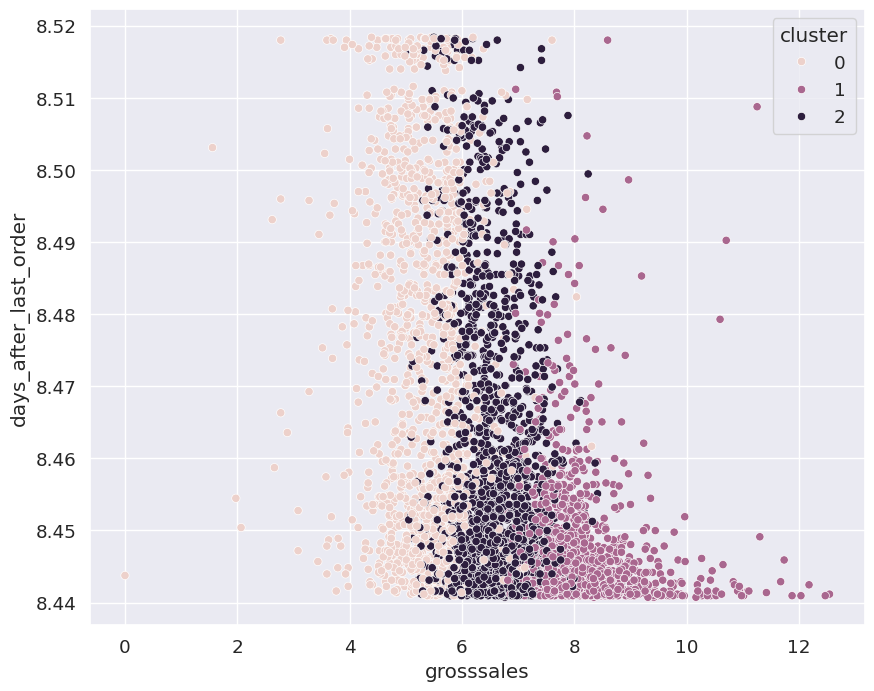

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x='grosssales', y='days_after_last_order', hue='cluster', data=df)

plt.show()

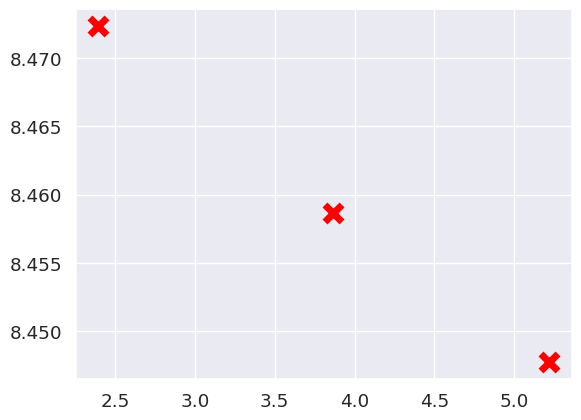

In [177]:
# 중심점 표시
for i in range(3):
  plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], marker='x', s=150, linewidths=5, zorder=10, color='red')